# FORESEE - Dark Photon

### Load Libraries 

In [1]:
import numpy as np
import sys
import os
src_path = "/Users/felixkling/Documents/GitHub/FORESEE/"
sys.path.append(src_path)
from src.foresee import Foresee, Utility, Model

## 1. Initialization 

In [2]:
foresee = Foresee(path=src_path)

## 2. Specifying the Model: Dark Photons

The phenomenology of the dark photon $A'$ can be described by the following Lagrangian

\begin{equation}
 \mathcal{L} = \frac{1}{2} m_{A'}^2 A'^2  - \epsilon e \sum \bar f \gamma^\mu f A'_\mu
\end{equation}

with the dark photon mass $m_{A'}$ and the kinetic mixing parameter $\epsilon$ as free parameters.

In [3]:
energy = "13.6"
modelname="DarkPhoton"
model = Model(modelname, path="./")

The dark photon is mainly produced in the 2body meson decays $\pi^0/\eta \to \gamma A'$. The corresponding branching fractions are

\begin{equation}
    \text{BR}(\pi^0 \to A' \gamma) = 2 \epsilon^2 \times\text{BR}(\pi^0 \to \gamma\gamma) \times \left(1-m_{A'}^2/m_\pi^2\right)^3
    \quad\quad\text{and}\quad\quad
    \text{BR}(\eta \to A' \gamma) = 2 \epsilon^2 \times\text{BR}(\eta \to \gamma\gamma) \times \left(1-m_{A'}^2/m_\eta^2\right)^3
\end{equation}

In the following, we model the production using `EPOSLHC`, `SIBYLL` and `QGSJET`. 

In [4]:
model.add_production_2bodydecay(
    pid0 = "111",
    pid1 = "22",
    br = "2.*0.99 * coupling**2 * pow(1.-pow(mass/self.masses('111'),2),3)",
    generator = ['EPOSLHC', 'SIBYLL', 'QGSJET'],
    energy = energy,
    nsample = 50
)

In [5]:
model.add_production_2bodydecay(
    pid0 = "221",
    pid1 = "22",
    br = "2.*0.39 * coupling**2 * pow(1.-pow(mass/self.masses('221'),2),3)",
    generator = ['EPOSLHC', 'SIBYLL', 'QGSJET'],
    energy = energy,
    nsample = 50, 
)

Particles can also be produced directly in collisions. In the case of dark photons, this proceeds through Bremsstrahlung. The spectra for LLPs at some reference coupling need to be provided for a fixed set of masses in the `model/direct` directory. We also provide an option to implement additional conditions in terms of the momentum `p`. In this case the requirement that pT of dark photon produced in Bremssteahlung is smaller than `1`, `2` and `0.5` GeV.

In [6]:
masses_brem = [ 
    0.01  ,  0.0126,  0.0158,  0.02  ,  0.0251,  0.0316,  0.0398,
    0.0501,  0.0631,  0.0794,  0.1   ,  0.1122,  0.1259,  0.1413,
    0.1585,  0.1778,  0.1995,  0.2239,  0.2512,  0.2818,  0.3162,
    0.3548,  0.3981,  0.4467,  0.5012,  0.5623,  0.6026,  0.631 ,
    0.6457,  0.6607,  0.6761,  0.6918,  0.7079,  0.7244,  0.7413,
    0.7586,  0.7762,  0.7943,  0.8128,  0.8318,  0.8511,  0.871 ,
    0.8913,  0.912 ,  0.9333,  0.955 ,  0.9772,  1.    ,  1.122 ,
    1.2589,  1.4125,  1.5849,  1.7783,  1.9953,  2.2387,  2.5119,
    2.8184,  3.1623,  3.9811,  5.0119,  6.3096,  7.9433, 10.    
]

model.add_production_direct(
    label = "Brem",
    energy = energy,
    condition = ["p.pt<1", "p.pt<2", "p.pt<0.5"],
    coupling_ref=1,
    masses = masses_brem,
)

The lifetime and BR of the dark photon will be loaded. 

In [7]:
model.set_ctau_1d(
    filename="model/ctau.txt", 
    coupling_ref=1
)

In [8]:
branchings = [
    ["e_e"         , "red"          , "solid" , r"ee"               , 0.050, 0.20],
    ["mu_mu"       , "orange"       , "solid" , r"$\mu\mu$"         , 0.170, 0.10],
    ["pi+_pi-"     , "blue"         , "solid" , r"$\pi^+\pi^-$"     , 0.810, 0.02],
    ["pi0_gamma"   , "dodgerblue"   , "solid" , r"$\pi^0\gamma$"    , 0.810, 0.02],
    ["pi+_pi-_pi0" , "cyan"         , "solid" , r"$\pi^0\pi^+\pi^-$", 0.810, 0.02],
    ["K_K"         , "green"        , "solid" , r"$KK$"             , 0.810, 0.02], 
]

model.set_br_1d(
    modes=[channel for channel,_,_,_,_,_ in branchings],
    finalstates=[[11,-11], [13,-13], [221,-211], [111,22], None, [321, -321]],
    filenames=["model/br/"+channel+".txt" for channel,_,_,_,_,_ in branchings],
)

Finally, let's set the model we just created. 

In [9]:
foresee.set_model(model=model)

## 3. Generate LLP Spectra

Let's first look at one benchmark scenario with $m_{A'}=50$ MeV and produce the corresponding fluxes. 

save data to file: ./model/LLP_spectra/13.6TeV_111_EPOSLHC_m_0.05.npy
save data to file: ./model/LLP_spectra/13.6TeV_111_SIBYLL_m_0.05.npy
save data to file: ./model/LLP_spectra/13.6TeV_111_QGSJET_m_0.05.npy
save data to file: ./model/LLP_spectra/13.6TeV_221_EPOSLHC_m_0.05.npy
save data to file: ./model/LLP_spectra/13.6TeV_221_SIBYLL_m_0.05.npy
save data to file: ./model/LLP_spectra/13.6TeV_221_QGSJET_m_0.05.npy
save data to file: ./model/LLP_spectra/13.6TeV_Brem_p.pt<1_m_0.05.npy
save data to file: ./model/LLP_spectra/13.6TeV_Brem_p.pt<2_m_0.05.npy
save data to file: ./model/LLP_spectra/13.6TeV_Brem_p.pt<0.5_m_0.05.npy


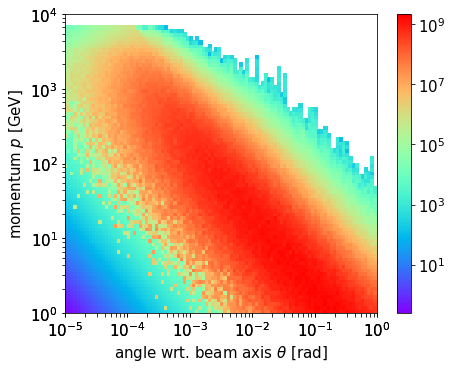

In [10]:
plot = foresee.get_llp_spectrum(0.05, coupling=1, do_plot=True)
plot.show()

Let's also produce  LLP spectra for various other masses (chosen to be equally spaced in log(mass)).

In [11]:
masses=[round(x,5) for x in np.logspace(-2,0.2,22+1)]

for mass in masses: foresee.get_llp_spectrum(mass=mass,coupling=1)

save data to file: ./model/LLP_spectra/13.6TeV_111_EPOSLHC_m_0.01.npy
save data to file: ./model/LLP_spectra/13.6TeV_111_SIBYLL_m_0.01.npy
save data to file: ./model/LLP_spectra/13.6TeV_111_QGSJET_m_0.01.npy
save data to file: ./model/LLP_spectra/13.6TeV_221_EPOSLHC_m_0.01.npy
save data to file: ./model/LLP_spectra/13.6TeV_221_SIBYLL_m_0.01.npy
save data to file: ./model/LLP_spectra/13.6TeV_221_QGSJET_m_0.01.npy
save data to file: ./model/LLP_spectra/13.6TeV_Brem_p.pt<1_m_0.01.npy
save data to file: ./model/LLP_spectra/13.6TeV_Brem_p.pt<2_m_0.01.npy
save data to file: ./model/LLP_spectra/13.6TeV_Brem_p.pt<0.5_m_0.01.npy
save data to file: ./model/LLP_spectra/13.6TeV_111_EPOSLHC_m_0.01259.npy
save data to file: ./model/LLP_spectra/13.6TeV_111_SIBYLL_m_0.01259.npy
save data to file: ./model/LLP_spectra/13.6TeV_111_QGSJET_m_0.01259.npy
save data to file: ./model/LLP_spectra/13.6TeV_221_EPOSLHC_m_0.01259.npy
save data to file: ./model/LLP_spectra/13.6TeV_221_SIBYLL_m_0.01259.npy
save data 

save data to file: ./model/LLP_spectra/13.6TeV_221_EPOSLHC_m_0.19953.npy
save data to file: ./model/LLP_spectra/13.6TeV_221_SIBYLL_m_0.19953.npy
save data to file: ./model/LLP_spectra/13.6TeV_221_QGSJET_m_0.19953.npy
save data to file: ./model/LLP_spectra/13.6TeV_Brem_p.pt<1_m_0.19953.npy
save data to file: ./model/LLP_spectra/13.6TeV_Brem_p.pt<2_m_0.19953.npy
save data to file: ./model/LLP_spectra/13.6TeV_Brem_p.pt<0.5_m_0.19953.npy
save data to file: ./model/LLP_spectra/13.6TeV_221_EPOSLHC_m_0.25119.npy
save data to file: ./model/LLP_spectra/13.6TeV_221_SIBYLL_m_0.25119.npy
save data to file: ./model/LLP_spectra/13.6TeV_221_QGSJET_m_0.25119.npy
save data to file: ./model/LLP_spectra/13.6TeV_Brem_p.pt<1_m_0.25119.npy
save data to file: ./model/LLP_spectra/13.6TeV_Brem_p.pt<2_m_0.25119.npy
save data to file: ./model/LLP_spectra/13.6TeV_Brem_p.pt<0.5_m_0.25119.npy
save data to file: ./model/LLP_spectra/13.6TeV_221_EPOSLHC_m_0.31623.npy
save data to file: ./model/LLP_spectra/13.6TeV_221_

We can now plot the `production rate vs mass` using the `foresee.plot_production()` function.

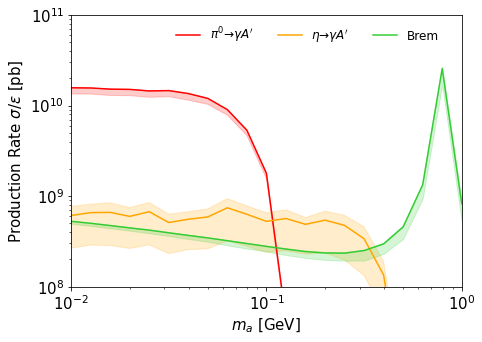

In [12]:
productions=[
    {"channels": ["111"], "color": "red", "label": r"$\pi^0 \to \gamma A'$", "generators": ["EPOSLHC","QGSJET","SIBYLL"]},
    {"channels": ["221"], "color": "orange", "label": r"$\eta \to \gamma A'$", "generators": ["EPOSLHC","QGSJET","SIBYLL"]},
    {"channels": ["Brem"], "color": "limegreen", "label": r"Brem", "generators": ["p.pt<1", "p.pt<2", "p.pt<0.5"]},
]

plot=foresee.plot_production(
    masses = masses,
    productions = productions,
    energy=energy,
    condition="logth<-3.7",  
    xlims=[0.01,1],ylims=[1e8,1e11],
    xlabel=r"$m_a$ [GeV]",
    ylabel=r"Production Rate $\sigma/\epsilon$ [pb]",
    legendloc=(0.97,1),
    fs_label=12,
    ncol=3,
)

## 4. Count Eventrate in Detector

Before counting the number of decays within the detector volume, let us specify the detector geometry. Here we use the default for 2022+2023 data. 

In [13]:
distance, selection, length, luminosity, channels = 474, "np.sqrt(x.x**2 + (x.y+0.065)**2)<.1", 1.5, 60, None
foresee.set_detector(distance=distance, selection=selection, length=length, luminosity=luminosity, channels=channels)

Let us look for one specific dark photon mass $m_{A'}=50$ MeV and $\epsilon=3\cdot 10^{-5}$ at how many particle decay inside the decay volume. The list `setups` defines three seups, with corresponding generators (for piopns and eta) and pT cuts (for Brem) specified in `modes`. 

In [14]:
setups = ['EPOSLHC_pT=1', 'SIBYLL_pT=2', 'QGSJET_pT=0.5']
modes = {'111': ['EPOSLHC', 'SIBYLL', 'QGSJET'], 
         '221':['EPOSLHC', 'SIBYLL', 'QGSJET'], 
         "Brem": ["p.pt<1", "p.pt<2", "p.pt<0.5"]}
output = foresee.get_events(mass=0.05, energy=energy, couplings=[3e-5], modes=modes)
coups, ctaus, nsigs, momenta, weights = output
for coup,ctau,nsig in zip(coups, ctaus, nsigs):
    for i in range(len(nsig)): 
        print ("coupling =", '{:5.3e}'.format(coup), setups[i], ": nsignal =", '{:5.3e}'.format(nsig[i]))

coupling = 3.000e-05 EPOSLHC_pT=1 : nsignal = 6.839e+00
coupling = 3.000e-05 SIBYLL_pT=2 : nsignal = 8.511e+00
coupling = 3.000e-05 QGSJET_pT=0.5 : nsignal = 3.930e+00


We can also plot the energy distribution. 

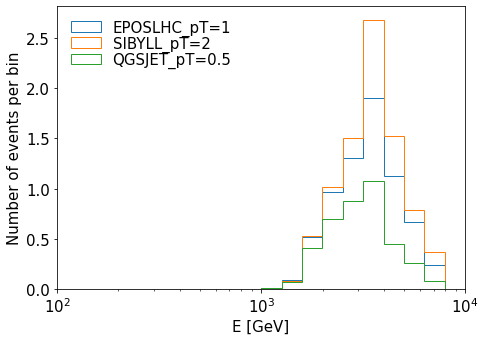

In [15]:
fig = plot.figure(figsize=(7,5))
ax = plot.subplot(1,1,1)
for coup,momentum,weight in zip(coups,momenta,weights):
    for w,label in zip(np.array(weight).T, setups):
        ax.hist([p.e for p in momentum], weights=w, bins=np.logspace(2,4, 20+1), histtype='step', label=label) 
    ax.set_xscale("log")
    ax.set_xlim(1e2,1e4) 
    ax.set_xlabel("E [GeV]") 
    ax.set_ylabel("Number of events per bin") 
    ax.legend(frameon=False, labelspacing=0, loc='upper left')
plot.tight_layout()

plot.show()

## 5. Write Event File

FORESEE also includes a function `write_events()` which obtains an unweighted sample of LLP decay events and saves them as a HEPMC file. Let's generate a file with 3 events. 

In [16]:
foresee.write_events(filename="model/events/test.hepmc", mass=.05, coupling=3e-5, energy=energy, numberevent=3, weightnames=setups)

/Users/felixkling/Documents/GitHub/FORESEE/src/foresee.py:1052: RuntimeWarning: invalid value encountered in true_divide
  weighted_combined_data = [[p,w/w[0]] for p,w in zip(weighted_raw_data[0], weights[0])]
/Users/felixkling/Documents/GitHub/FORESEE/src/foresee.py:1052: RuntimeWarning: divide by zero encountered in true_divide
  weighted_combined_data = [[p,w/w[0]] for p,w in zip(weighted_raw_data[0], weights[0])]
/Users/felixkling/Documents/GitHub/FORESEE/src/foresee.py:1066: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  channels=np.array(channels).T


Let us have a look at a the output. Note that there are multiple weights (last numbers in `E`) for different generators in `N`. 

In [17]:
f = open("model/events/test.hepmc", 'r')
file_contents = f.read()
print (file_contents)

HepMC::Version 2.06.09
HepMC::IO_GenEvent-START_EVENT_LISTING
E 0 -1 -1. -1. -1. 0 -1 1 1 0 0 3 2.1677196267660634 2.1677196267660634 2.1677196267660634
N 3 "EPOSLHC_pT=1" "SIBYLL_pT=2" "QGSJET_pT=0.5"
U GEV MM
C 2.1677196267660634 0.
F 0 0 0 0 0 0 0 0 0
V -1 0 0.5315993172 30.8676096094 875.1481542446 0 1 2 0
P 1 32 0.0066089811 0.3837541602 5892.8914240917 5892.8914368029 0.0499999017 2 0 0 -1 0
P 2 11 0.0244095899 0.28946931 4567.4930369795 4567.4930462174 0.0005106568 1 0 0 0 0
P 3 -11 -0.0178006083 0.0942848738 1325.3987481701 1325.3987516433 0.0005115678 1 0 0 0 0
E 1 -1 -1. -1. -1. 0 -1 1 1 0 0 3 2.1677196267660634 1.3264682480488486 0.3657141336499845
N 3 "EPOSLHC_pT=1" "SIBYLL_pT=2" "QGSJET_pT=0.5"
U GEV MM
C 2.1677196267660634 0.
F 0 0 0 0 0 0 0 0 0
V -1 0 -12.456102928 2.5103111761 800.8611624092 0 1 2 0
P 1 32 -0.077577344 0.0156343661 2952.0999671104 2952.0999685945 0.050000032 2 0 0 -1 0
P 2 11 -0.0130561 0.0123573498 1429.9127230262 1429.9127231393 0.0005113402 1 0 0 0 0

## 6. Parameter Scan

To get a sensitivity curve, we need to perform a paramerer scan loop over different masses and use the previously introduced funtion `get_events`. The results will be written into a `.npy` file that we can store and plot later. Note that there are multiple files for different generators (this might be changed in the future). 

In [19]:
#specify setup
luminosity, distance, length = 60 , 474, 1.5
setup, selection, channels = "default", "np.sqrt(x.x**2 + (x.y+0.065)**2)<.1", None
foresee.set_detector(length=length, selection=selection, channels=channels, distance=distance, 
    luminosity=luminosity)

#define setups and modes
setups = ['EPOSLHC_pT=1', 'SIBYLL_pT=2', 'QGSJET_pT=0.5']
modes = {
    '111': ['EPOSLHC', 'SIBYLL', 'QGSJET'], 
    '221': ['EPOSLHC', 'SIBYLL', 'QGSJET'], 
    'Brem': ["p.pt<1", "p.pt<2", "p.pt<0.5"]
}

#get reach  
list_nevents = {label:[] for label in setups}
for mass in masses:
    couplings, _, nevents, _, _  = foresee.get_events(mass=mass, energy=energy, 
        couplings = np.logspace(-8,3,101),modes=modes)
    for i,label in enumerate(setups): list_nevents[label].append(nevents.T[i])  
        
#save results
for label in setups: 
    np.save("model/results/"+energy+"TeV_"+setup+"_"+label+".npy",[masses,couplings,list_nevents[label]])

/Users/felixkling/anaconda/envs/python3/lib/python3.6/site-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


## 7. Reach Plot

Now let's plot the results. We first specify all detector setups for which we want to show result (filename in model/results directory, label, color, linestyle, opacity alpha for filled contours, required number of events). Here we show the different generators.

In [32]:
setups = [ 
    ["13.6TeV_default_EPOSLHC_pT=1.npy",  "EPOS / pT=1"    , "red"        ,  "solid"  , 0., 3],
    ["13.6TeV_default_SIBYLL_pT=2.npy" ,  "SYBILL / pT=2"  , "magenta"    ,  "solid"  , 0., 3],
    ["13.6TeV_default_QGSJET_pT=0.5.npy" ,"QGSJET / pT=0.5", "orange"     ,  "solid"  , 0., 3],
]

Then we specify all the existing bounds (filename in model/bounds directory, label, label position x, label position y, label rotation). Here we separate the bounds obtained by experimental collaboratios and theory recasts. 

In [33]:
bounds2 = [ 
    ["bounds_E137.txt",  "E137",  0.015, 9.00e-8, 0  ],
    ["bounds_NuCal.txt", "NuCal", 0.101, 3.00e-6, -20],
    ["bounds_Charm.txt", "CHARM", 0.130, 7.00e-7, -20],
    ["bounds_Orsay.txt", "Orsay", 0.021, 2.00e-5, -22],
    ["bounds_E141.txt",  "E141",  0.011, 4.00e-5, 20 ],
]
bounds = [ 
    ["bounds_NA48.txt",  "NA48",  0.015, 1.40e-3, 0  ],
    ["bounds_LHCb1.txt", "LHCb",  0.220, 7.00e-5, 0  ],
    ["bounds_LHCb2.txt",  None  , 0    , 0      , 0  ],
    ["bounds_LHCb3.txt",  None  , 0    , 0      , 0  ],
    ["bounds_NA64.txt",  "NA64",  0.015, 2.40e-4, -30],
    ["bounds_BaBar.txt", "BaBar", 0.320, 1.40e-3, 0  ],
    ["bounds_A1.txt",    "A1",    0.100, 1.40e-3, 0  ],
    ["bounds_KLOE.txt",  "KLOE",  0.620, 1.40e-3, 0  ],
]

Finally, we can plot everything using `foresee.plot_reach()`. It returns a matplotlib instance, to which we can add further lines and which we can show or save. Below, we add the dark matter relict target line for a specific benchmark.

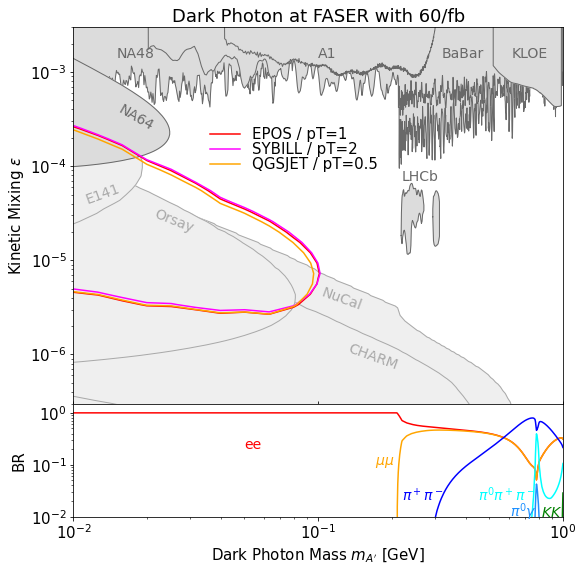

In [34]:
branchings = [
    ["e_e"         , "red"          , "solid" , r"ee"               , 0.050, 0.20],
    ["mu_mu"       , "orange"       , "solid" , r"$\mu\mu$"         , 0.170, 0.10],
    ["pi+_pi-"     , "blue"         , "solid" , r"$\pi^+\pi^-$"     , 0.220, 0.02],
    ["pi0_gamma"   , "dodgerblue"   , "solid" , r"$\pi^0\gamma$"    , 0.610, 0.01],
    ["pi+_pi-_pi0" , "cyan"         , "solid" , r"$\pi^0\pi^+\pi^-$", 0.450, 0.02],
    ["K_K"         , "green"        , "solid" , r"$KK$"             , 0.810, 0.01], 
]


plot, ax, ax2 = foresee.plot_reach(
    setups=setups,
    bounds=bounds,
    bounds2=bounds2,
    projections=[],
    title = "Dark Photon at FASER with 60/fb", 
    xlims = [0.01,1], 
    ylims = [3e-7,3e-3],
    xlabel=r"Dark Photon Mass $m_{A'}$ [GeV]", 
    ylabel=r"Kinetic Mixing $\epsilon$",
    legendloc=(0.65,0.77),
    branchings=branchings,
    figsize=(8,8),
)

plot.subplots_adjust(left=0.12, right=0.97, bottom=0.10, top=0.95)
plot.savefig("/Users/felixkling/Downloads/Figure.pdf")
plot.show()
